<a href="https://colab.research.google.com/github/19PA1A0465/mini-project/blob/main/model_with_kfold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
 #importing all the required packages
import pandas as pd # for handling data in the form of tables
import numpy as np # For handling matrix
from sklearn.model_selection import train_test_split # For spliting the data into train and test
from sklearn import metrics # for calculation of accuracy and precision
from sklearn.metrics import confusion_matrix #performance measures
from sklearn import svm 
import seaborn as sns#for visualization
from matplotlib import pyplot
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve# to calculate performance of model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score








# **Reading** **the** **data**

In [7]:

dataset=pd.read_csv('feature data of all bands.csv')#read csv file

# **Data** **Inspection**

In [8]:
# To see the first 5 rows of our dataset we use head() 
dataset.head()

,Mean,Kurtosis,Varience,Max_Svd,Entropy_Svd,Skewness,Target
0,0.000753,3.9757,0.0020,2.8817,43.5388,0.0135,0
1,-0.000102,4.4953,0.0017,2.6056,35.7801,0.0015,0
2,-0.000090,4.5453,0.0016,2.5671,35.2603,-0.0126,0
3,0.000496,4.4307,0.0017,2.6443,36.7637,-0.0053,0
4,-0.000377,3.1227,0.0030,3.4908,61.7647,-0.1275,0


In [9]:
dataset.shape#to know the sh ape of datafeame

(1000, 7)

In [10]:
#To know the columns names in dataset we use columns 
dataset.columns

Index(['Mean', 'Kurtosis', 'Varience', 'Max_Svd', 'Entropy_Svd', 'Skewness',
       'Target'],
      dtype='object')

In [11]:
# To study the statastical summary of dataset we use discribe()
dataset.describe()

,Mean,Kurtosis,Varience,Max_Svd,Entropy_Svd,Skewness,Target
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,4.126154e-05,209.450938,0.001088,1.541447,13.079525,-0.466901,0.50000
std,5.601005e-04,236.171295,0.001609,1.423313,17.753771,6.532415,0.50025
min,-4.600000e-03,2.622300,0.000003,0.103900,0.086500,-27.773500,0.00000
25%,-2.088550e-05,11.082075,0.000023,0.304725,0.677400,-1.463050,0.00000
50%,-5.195000e-08,135.571500,0.000137,0.747400,2.313250,-0.002200,0.50000
75%,2.035425e-05,290.646875,0.001700,2.655000,19.998300,0.982925,1.00000
max,4.000000e-03,963.478400,0.007900,5.672700,103.372600,27.463400,1.00000


# **About** **the** **distribution**

In [12]:
#To check Whether NA's (missingvalues) present in dataset
dataset.isnull().sum()

Mean           0
Kurtosis       0
Varience       0
Max_Svd        0
Entropy_Svd    0
Skewness       0
Target         0
dtype: int64

In [13]:
#grouping data based on outcomes
print(dataset.groupby("Target").size())

Target
0    500
1    500
dtype: int64


# **Data** **visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


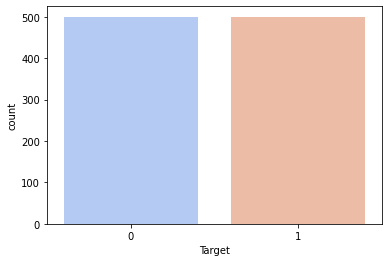

In [14]:
sns.countplot(dataset['Target'],label="Count",palette="coolwarm")# visualizing the count of each element  in outcome column

# **Splitting data**

In [15]:
X,y=dataset.loc[:,['Mean', 'Kurtosis', 'Varience', 'Max_Svd', 'Entropy_Svd', 'Skewness']], dataset['Target']
  

In [20]:
# calculate the ideal test condition
#ideal, _, _ = evaluate_model(LeaveOneOut())
#print('Ideal: %.3f' % ideal)
def report(clf):
  folds = range(2,31)

  # record mean and min/max of each set of results
  means, mins, maxs = list(),list(),list()
  # evaluate each k value
  for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    k_mean =mean(scores)
    # report performance
    print('> folds=%d, accuracy=%.3f' % (k, k_mean))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean

In [21]:
clf = svm.SVC(kernel='poly',degree=2) 
#declaring a variable to svm model



In [22]:
print("SVM Classifier")
report(clf)

SVM Classifier
> folds=2, accuracy=0.496
> folds=3, accuracy=0.489
> folds=4, accuracy=0.488
> folds=5, accuracy=0.481
> folds=6, accuracy=0.480
> folds=7, accuracy=0.480
> folds=8, accuracy=0.464
> folds=9, accuracy=0.460
> folds=10, accuracy=0.463
> folds=11, accuracy=0.466
> folds=12, accuracy=0.460
> folds=13, accuracy=0.461
> folds=14, accuracy=0.458
> folds=15, accuracy=0.454
> folds=16, accuracy=0.451
> folds=17, accuracy=0.453
> folds=18, accuracy=0.445
> folds=19, accuracy=0.456
> folds=20, accuracy=0.448
> folds=21, accuracy=0.440
> folds=22, accuracy=0.452
> folds=23, accuracy=0.441
> folds=24, accuracy=0.433
> folds=25, accuracy=0.447
> folds=26, accuracy=0.435
> folds=27, accuracy=0.439
> folds=28, accuracy=0.449
> folds=29, accuracy=0.436
> folds=30, accuracy=0.436


In [23]:
#fittting the training set into model
tree = DecisionTreeClassifier()

In [24]:
print("Decision Tree Classifier")
report(tree)

Decision Tree Classifier
> folds=2, accuracy=0.577
> folds=3, accuracy=0.607
> folds=4, accuracy=0.596
> folds=5, accuracy=0.621
> folds=6, accuracy=0.631
> folds=7, accuracy=0.614
> folds=8, accuracy=0.629
> folds=9, accuracy=0.617
> folds=10, accuracy=0.643
> folds=11, accuracy=0.644
> folds=12, accuracy=0.624
> folds=13, accuracy=0.627
> folds=14, accuracy=0.621
> folds=15, accuracy=0.615
> folds=16, accuracy=0.650
> folds=17, accuracy=0.642
> folds=18, accuracy=0.628
> folds=19, accuracy=0.652
> folds=20, accuracy=0.633
> folds=21, accuracy=0.653
> folds=22, accuracy=0.639
> folds=23, accuracy=0.647
> folds=24, accuracy=0.652
> folds=25, accuracy=0.618
> folds=26, accuracy=0.652
> folds=27, accuracy=0.633
> folds=28, accuracy=0.635
> folds=29, accuracy=0.660
> folds=30, accuracy=0.639


In [25]:
#fitting our nodel with training sets
ran=RandomForestClassifier(n_estimators=100)

In [26]:
print("Random Forest Classifier")
report(ran)

Random Forest Classifier
> folds=2, accuracy=0.655
> folds=3, accuracy=0.653
> folds=4, accuracy=0.681
> folds=5, accuracy=0.679
> folds=6, accuracy=0.679
> folds=7, accuracy=0.663
> folds=8, accuracy=0.678
> folds=9, accuracy=0.654
> folds=10, accuracy=0.677
> folds=11, accuracy=0.668
> folds=12, accuracy=0.674
> folds=13, accuracy=0.667
> folds=14, accuracy=0.667
> folds=15, accuracy=0.681
> folds=16, accuracy=0.674
> folds=17, accuracy=0.679
> folds=18, accuracy=0.672
> folds=19, accuracy=0.666
> folds=20, accuracy=0.667
> folds=21, accuracy=0.674
> folds=22, accuracy=0.679
> folds=23, accuracy=0.665
> folds=24, accuracy=0.664
> folds=25, accuracy=0.674
> folds=26, accuracy=0.672
> folds=27, accuracy=0.670
> folds=28, accuracy=0.692
> folds=29, accuracy=0.666
> folds=30, accuracy=0.681


In [27]:
#now building  adaboostclassifier on training sets and fitting 
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100
)

In [28]:
print("Adaboost")
report(classifier)

Adaboost
> folds=2, accuracy=0.588
> folds=3, accuracy=0.581
> folds=4, accuracy=0.585
> folds=5, accuracy=0.602
> folds=6, accuracy=0.581
> folds=7, accuracy=0.590
> folds=8, accuracy=0.603
> folds=9, accuracy=0.586
> folds=10, accuracy=0.605
> folds=11, accuracy=0.603
> folds=12, accuracy=0.591
> folds=13, accuracy=0.596
> folds=14, accuracy=0.617
> folds=15, accuracy=0.609
> folds=16, accuracy=0.603
> folds=17, accuracy=0.591
> folds=18, accuracy=0.593
> folds=19, accuracy=0.591
> folds=20, accuracy=0.596
> folds=21, accuracy=0.593
> folds=22, accuracy=0.609
> folds=23, accuracy=0.592
> folds=24, accuracy=0.591
> folds=25, accuracy=0.612
> folds=26, accuracy=0.599
> folds=27, accuracy=0.605
> folds=28, accuracy=0.594
> folds=29, accuracy=0.593
> folds=30, accuracy=0.615


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=50)

In [30]:
print("KNN")
report(knc)

KNN
> folds=2, accuracy=0.490
> folds=3, accuracy=0.466
> folds=4, accuracy=0.487
> folds=5, accuracy=0.498
> folds=6, accuracy=0.494
> folds=7, accuracy=0.489
> folds=8, accuracy=0.484
> folds=9, accuracy=0.487
> folds=10, accuracy=0.494
> folds=11, accuracy=0.466
> folds=12, accuracy=0.483
> folds=13, accuracy=0.488
> folds=14, accuracy=0.478
> folds=15, accuracy=0.475
> folds=16, accuracy=0.485
> folds=17, accuracy=0.476
> folds=18, accuracy=0.484
> folds=19, accuracy=0.467
> folds=20, accuracy=0.486
> folds=21, accuracy=0.474
> folds=22, accuracy=0.483
> folds=23, accuracy=0.485
> folds=24, accuracy=0.488
> folds=25, accuracy=0.479
> folds=26, accuracy=0.488
> folds=27, accuracy=0.490
> folds=28, accuracy=0.490
> folds=29, accuracy=0.471
> folds=30, accuracy=0.485


In [31]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [32]:
print("Logistic Regression")
report(lrc)

Logistic Regression
> folds=2, accuracy=0.483
> folds=3, accuracy=0.458
> folds=4, accuracy=0.470
> folds=5, accuracy=0.465
> folds=6, accuracy=0.474
> folds=7, accuracy=0.466
> folds=8, accuracy=0.475
> folds=9, accuracy=0.464
> folds=10, accuracy=0.476
> folds=11, accuracy=0.471
> folds=12, accuracy=0.481
> folds=13, accuracy=0.472
> folds=14, accuracy=0.478
> folds=15, accuracy=0.462
> folds=16, accuracy=0.481
> folds=17, accuracy=0.464
> folds=18, accuracy=0.480
> folds=19, accuracy=0.461
> folds=20, accuracy=0.479
> folds=21, accuracy=0.465
> folds=22, accuracy=0.471
> folds=23, accuracy=0.477
> folds=24, accuracy=0.477
> folds=25, accuracy=0.475
> folds=26, accuracy=0.469
> folds=27, accuracy=0.480
> folds=28, accuracy=0.475
> folds=29, accuracy=0.478
> folds=30, accuracy=0.470


In [33]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=100)

In [34]:
print("bagging")
report(bc)

bagging
> folds=2, accuracy=0.653
> folds=3, accuracy=0.652
> folds=4, accuracy=0.677
> folds=5, accuracy=0.684
> folds=6, accuracy=0.683
> folds=7, accuracy=0.663
> folds=8, accuracy=0.679
> folds=9, accuracy=0.662
> folds=10, accuracy=0.675
> folds=11, accuracy=0.675
> folds=12, accuracy=0.680
> folds=13, accuracy=0.675
> folds=14, accuracy=0.679
> folds=15, accuracy=0.678
> folds=16, accuracy=0.698
> folds=17, accuracy=0.673
> folds=18, accuracy=0.675
> folds=19, accuracy=0.692
> folds=20, accuracy=0.682
> folds=21, accuracy=0.669
> folds=22, accuracy=0.670
> folds=23, accuracy=0.679
> folds=24, accuracy=0.666
> folds=25, accuracy=0.679
> folds=26, accuracy=0.686
> folds=27, accuracy=0.694
> folds=28, accuracy=0.671
> folds=29, accuracy=0.679
> folds=30, accuracy=0.684
